In [26]:
import numpy as np
import pandas as pd
from CSVUtils import *
import pickle
from os import path
import matplotlib.pyplot as plt

In [27]:
tBill_dir = "./input/"
tbill_df = csv2df(tBill_dir, "^IRX.csv", source="yahoo")
tbill_df = tbill_df.dropna()
tbill_df.reset_index(inplace=True, drop=True)

In [28]:
startDate = pd.to_datetime("2015-01-01")
endDate = pd.to_datetime("2019-12-31")
np.mean(tbill_df[(tbill_df["Date"]>=startDate) & (tbill_df["Date"]<=endDate)]['Price'])*0.01

0.01041641826923077

In [29]:
def getBuyNHold(startDate, endDate):
    price_dir = "./from github/Stock-Trading-Environment/data"
    file_names = ["^BVSP_new", "^TWII_new", "^IXIC_new"]
    from CSVUtils import csv2df
    df_list = []
    for name in file_names:
        df = csv2df(price_dir, name+".csv", source="done")
        df = df[(df['Date']>=startDate)&(df['Date']<=endDate)].reset_index(drop = True)
        init_value = 100000
        start_price = df['Actual Price'][0]
        inv_number = init_value/start_price
        df['BuyNHold'] = df['Actual Price']*inv_number
        df_list.append(df)
    buyNHold_totalValue = df_list[0]['BuyNHold'] +df_list[1]['BuyNHold']+df_list[2]['BuyNHold']
    return buyNHold_totalValue

In [30]:
def getSharpeRatio(netValue, startDate, endDate, tbill_df):
    RISKFREE = 0.035
#     print("startValue:", netValue.iloc[0]," ,endValue: ", netValue.iloc[-1])
    ratioSeries = netValue/netValue.iloc[0]
    riskFree = np.mean(tbill_df[(tbill_df["Date"]>=startDate) & (tbill_df["Date"]<=endDate)]['Price'])*0.01
    finalReturn = (ratioSeries.iloc[-1]-ratioSeries.iloc[0]-riskFree)/ratioSeries.iloc[0]
    return finalReturn/np.std(ratioSeries)

In [31]:
def getSharpeRatioByDate(startDate, endDate, tbill_df):
    netValue = getBuyNHold(startDate, endDate)
    return getSharpeRatio(netValue, startDate, endDate, tbill_df)

In [40]:
#Benchmark
buyNHold_fulldict = {}
buyNHold_finaldict = {}
for start in range(2000, 2016):
    startDate = pd.to_datetime(str(start)+"-01-01")
    for end in range(start+4, 2020):
        endDate = pd.to_datetime(str(end)+"-12-31")
        buyNHold_fulldict[(start, end)] = getBuyNHold(startDate, endDate)
        buyNHold_finaldict[(start, end)] = getBuyNHold(startDate, endDate).iloc[-1]
        print(start, end)

2000 2004
2000 2005
2000 2006
2000 2007
2000 2008
2000 2009
2000 2010
2000 2011
2000 2012
2000 2013
2000 2014
2000 2015
2000 2016
2000 2017
2000 2018
2000 2019
2001 2005
2001 2006
2001 2007
2001 2008
2001 2009
2001 2010
2001 2011
2001 2012
2001 2013
2001 2014
2001 2015
2001 2016
2001 2017
2001 2018
2001 2019
2002 2006
2002 2007
2002 2008
2002 2009
2002 2010
2002 2011
2002 2012
2002 2013
2002 2014
2002 2015
2002 2016
2002 2017
2002 2018
2002 2019
2003 2007
2003 2008
2003 2009
2003 2010
2003 2011
2003 2012
2003 2013
2003 2014
2003 2015
2003 2016
2003 2017
2003 2018
2003 2019
2004 2008
2004 2009
2004 2010
2004 2011
2004 2012
2004 2013
2004 2014
2004 2015
2004 2016
2004 2017
2004 2018
2004 2019
2005 2009
2005 2010
2005 2011
2005 2012
2005 2013
2005 2014
2005 2015
2005 2016
2005 2017
2005 2018
2005 2019
2006 2010
2006 2011
2006 2012
2006 2013
2006 2014
2006 2015
2006 2016
2006 2017
2006 2018
2006 2019
2007 2011
2007 2012
2007 2013
2007 2014
2007 2015
2007 2016
2007 2017
2007 2018
2007 2019


In [56]:
df_dict = []
for key in buyNHold_finaldict:
    start = key[0]
    end = key[1]
    df_dict.append({
        "start": start,
        "end":end,
        "value": buyNHold_finaldict[key],
        "profit": (buyNHold_finaldict[key]-300000)/300000,
        "log_profit": np.log((buyNHold_finaldict[key])/300000)
    })

In [57]:
df = pd.DataFrame(df_dict)

In [58]:
pivot = df.pivot(index="start", columns="end", values="log_profit")

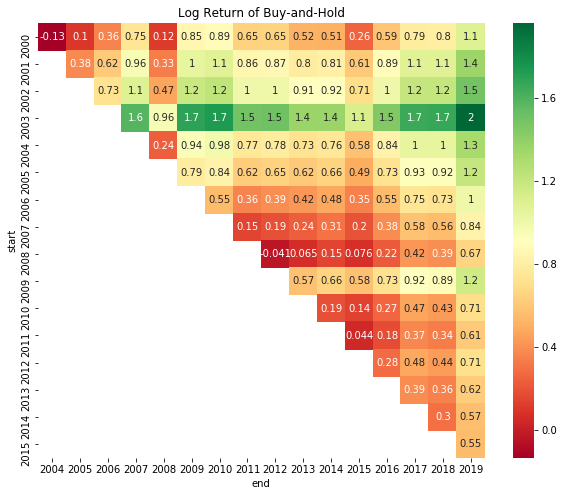

In [69]:
import seaborn as sns
plt.figure(figsize=(10,8))
plt.title("Log Return of Buy-and-Hold")
sns.heatmap(df.pivot(index="start", columns="end", values="log_profit"), annot=True, cmap="RdYlGn")

In [8]:
#Benchmark
startDate = pd.to_datetime("2015-01-01")
endDate = pd.to_datetime("2019-12-31")
getSharpeRatioByDate(startDate, endDate, tbill_df)

3.0693999444726088

In [9]:
#Benchmark
startDate = pd.to_datetime("2007-01-01")
endDate = pd.to_datetime("2010-12-31")
getSharpeRatioByDate(startDate, endDate, tbill_df)

1.8942480597911275

In [10]:
#Benchmark
startDate = pd.to_datetime("2001-01-01")
endDate = pd.to_datetime("2004-12-31")
getSharpeRatioByDate(startDate, endDate, tbill_df)

1.0730432708521411

In [11]:
startDate = pd.to_datetime("2015-01-01")
endDate = pd.to_datetime("2019-12-31")
buyNhold = getBuyNHold(startDate, endDate)
(buyNhold.iloc[-1]-buyNhold.iloc[0])/buyNhold.iloc[0]

0.7274570781961596

In [21]:
ROOT_DIR = "./from github/Stock-Trading-Environment/"
freq_list = [
#     {
#         "freq": "daily",
#         "type": "d w/o",
#         "DIR": "./output/1000",
#         "prefix": "0418-dailyFreq_noLeak_noCrisis--detailed-ModelNo_200000-",
#         "start_date": pd.to_datetime("2015-01-01"),
#         "end_date": pd.to_datetime("2019-12-31"),
#     },
    {
        "freq": "daily",
        "type": "d w/o",
        "DIR": "./output/201",
        "prefix": "BRZ+TW+NASDAQ-Training_detailed-ModelNo-100000-",
        "start_date": pd.to_datetime("2015-01-01"),
        "end_date": pd.to_datetime("2019-12-31"),
    },
    {
        "freq": "weekly",
        "type": "w w/o",
        "DIR": "./output/1000",
        "prefix": "0418-weeklyFreq_noLeak_noCrisis--detailed-ModelNo_200000-",
        "start_date": pd.to_datetime("2015-01-01"),
        "end_date": pd.to_datetime("2019-12-31"),
    },
#     {
#         "freq": "weekly",
#         "type": "w w/o 1",
#         "DIR": "./output/204",
#         "prefix": "BRZ+TW+NASDAQ-Training-punish_detailed-ModelNo-200000-",
#         "start_date": pd.to_datetime("2015-01-01"),
#         "end_date": pd.to_datetime("2019-12-31"),
#     },
    {
        "freq": "monthly",
        "type": "m w/o",
        "DIR": "./output/1000",
        "prefix": "0418-monthlyFreq_noLeak_noCrisis--detailed-ModelNo_200000-",
        "start_date": pd.to_datetime("2015-01-01"),
        "end_date": pd.to_datetime("2019-12-31"),
    },
    {
        "freq": "daily",
        "type": "d w/",
        "DIR": "./output/1001",
        "prefix": "0418-dailyFreq_haveLeak_noCrisis--detailed-ModelNo_200000-",
        "start_date": pd.to_datetime("2015-01-01"),
        "end_date": pd.to_datetime("2019-12-31"),
    },
    {
        "freq": "weekly",
        "type": "w w/",
        "DIR": "./output/1001",
        "prefix": "0418-weeklyFreq_haveLeak_noCrisis--detailed-ModelNo_200000-",
        "start_date": pd.to_datetime("2015-01-01"),
        "end_date": pd.to_datetime("2019-12-31"),
    },
#     {
#         "freq": "monthly",
#         "type": "m w/",
#         "DIR": "./output/1001",
#         "prefix": "0418-monthlyFreq_haveLeak_noCrisis--detailed-ModelNo_200000-",
#         "start_date": pd.to_datetime("2015-01-01"),
#         "end_date": pd.to_datetime("2019-12-31"),
#     },
    {
        "freq": "monthly",
        "type": "m w/",
        "DIR": "./output/306",
        "prefix": "BRZ_TW_NASDAQ-Selected_Trans-withleakage+RSI-_detailed-ModelNo-200000-",
        "start_date": pd.to_datetime("2015-01-01"),
        "end_date": pd.to_datetime("2019-12-31"),
    },
]
bnh_ratio={
    "2015-2019": 3.0693999444726088,
    "2001-2004": 1.0730432708521411,
    "2007-2010": 1.8942480597911275,
}

d w/o
AVG Sharpe:  0.9848947011283787
AVG Act Profit:  -0.3691442299557554
AVG Nom Profit:  0.166175284470426
w w/o
AVG Sharpe:  2.978040503422222
AVG Act Profit:  -0.06682620447896845
AVG Nom Profit:  0.6780643215324119
m w/o
AVG Sharpe:  2.0999005700077054
AVG Act Profit:  -0.030840903219972775
AVG Nom Profit:  0.3746332542914379
d w/
AVG Sharpe:  2.479484283256175
AVG Act Profit:  0.06252484146302043
AVG Nom Profit:  0.5535923981715886
w w/
AVG Sharpe:  2.0948598786058588
AVG Act Profit:  -0.03753148167189702
AVG Nom Profit:  0.3656084050888656
m w/
AVG Sharpe:  2.9957039479683614
AVG Act Profit:  0.0029373947521821415
AVG Nom Profit:  0.7793938402924498


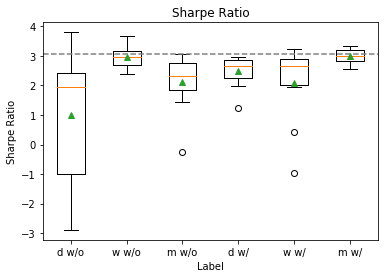

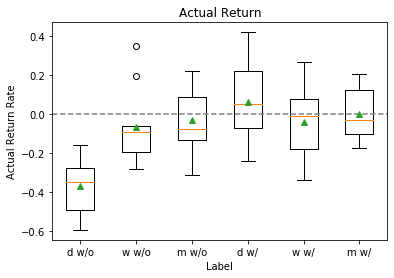

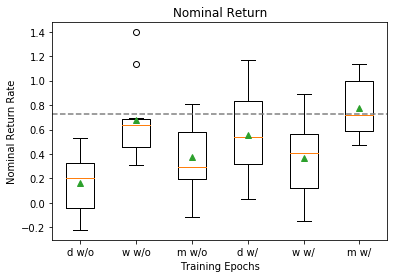

In [22]:
experiment_result = []
actual_return_result = []
nominal_return_result = []
types = [tmp['type'] for tmp in freq_list]
a = True
for j, experiment in enumerate(freq_list):
    DIR = path.join("./from github/Stock-Trading-Environment",experiment["DIR"])
    sharpe_list = []
    actual_profit_list = []
    nominal_profit_list = []
    for i in range(10):
        record = pickle.load(open(path.join(DIR,experiment["prefix"]+str(i)+".out"), "rb"))
        df = pd.DataFrame(record)
        startDate = experiment["start_date"]
        endDate = experiment["end_date"]
        sharpe = getSharpeRatio(df["net_worth"], startDate, endDate, tbill_df)
        sharpe_list.append(sharpe)
#         print(i, sharpe)
        actual_profit_list.append(df["actual_profit"].iloc[-1]/518237.12345884787)
        nominal_profit_list.append((df["net_worth"].iloc[-1]-300000)/300000)
    
    avg_sharpe = np.mean(sharpe_list)
    experiment_result.append(np.array(sharpe_list))
    actual_return_result.append(np.array(actual_profit_list))
    nominal_return_result.append(np.array(nominal_profit_list))
    print(experiment['type'])
    print("AVG Sharpe: ", avg_sharpe)
    print("AVG Act Profit: ", np.mean(actual_profit_list))
    print("AVG Nom Profit: ", np.mean(nominal_profit_list))
    print("===================")
    a = False
    
plt.boxplot(experiment_result, labels=types, showmeans=True)
plt.axhline(y=bnh_ratio["2015-2019"], color = "grey", linestyle='--')
plt.ylabel("Sharpe Ratio")
plt.xlabel("Label")
plt.title("Sharpe Ratio")
plt.show()

plt.boxplot(actual_return_result, labels=types, showmeans=True)
plt.axhline(y=0, color = "grey", linestyle='--')
plt.ylabel("Actual Return Rate")
plt.xlabel("Label")
plt.title("Actual Return")
plt.show()

plt.boxplot(nominal_return_result, labels=types, showmeans=True)
plt.axhline(y=218237.12345884787/300000, color = "grey", linestyle='--')
plt.ylabel("Nominal Return Rate")
plt.xlabel("Training Epochs")
plt.title("Nominal Return")
plt.show()


d w/o
AVG Sharpe:  0.9848947011283787
AVG Act Profit:  -0.3691442299557554
AVG Nom Profit:  0.166175284470426
w w/o
AVG Sharpe:  2.978040503422222
AVG Act Profit:  -0.06682620447896845
AVG Nom Profit:  0.6780643215324119
m w/o
AVG Sharpe:  2.0999005700077054
AVG Act Profit:  -0.030840903219972775
AVG Nom Profit:  0.3746332542914379


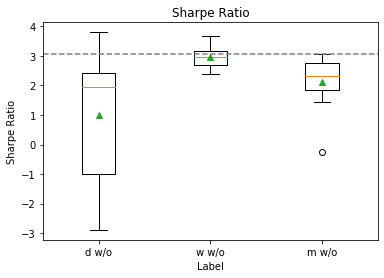

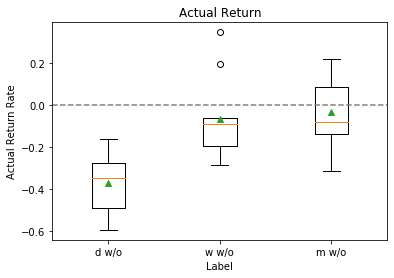

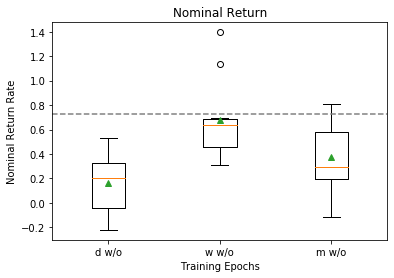

In [24]:
experiment_result = []
actual_return_result = []
nominal_return_result = []
types = [tmp['type'] for tmp in freq_list]
a = True
for j, experiment in enumerate(freq_list[:3]):
    DIR = path.join("./from github/Stock-Trading-Environment",experiment["DIR"])
    sharpe_list = []
    actual_profit_list = []
    nominal_profit_list = []
    for i in range(10):
        record = pickle.load(open(path.join(DIR,experiment["prefix"]+str(i)+".out"), "rb"))
        df = pd.DataFrame(record)
        startDate = experiment["start_date"]
        endDate = experiment["end_date"]
        sharpe = getSharpeRatio(df["net_worth"], startDate, endDate, tbill_df)
        sharpe_list.append(sharpe)
#         print(i, sharpe)
        actual_profit_list.append(df["actual_profit"].iloc[-1]/518237.12345884787)
        nominal_profit_list.append((df["net_worth"].iloc[-1]-300000)/300000)
    
    avg_sharpe = np.mean(sharpe_list)
    experiment_result.append(np.array(sharpe_list))
    actual_return_result.append(np.array(actual_profit_list))
    nominal_return_result.append(np.array(nominal_profit_list))
    print(experiment['type'])
    print("AVG Sharpe: ", avg_sharpe)
    print("AVG Act Profit: ", np.mean(actual_profit_list))
    print("AVG Nom Profit: ", np.mean(nominal_profit_list))
    print("===================")
    a = False
    
plt.boxplot(experiment_result, labels=types[:3], showmeans=True)
plt.axhline(y=bnh_ratio["2015-2019"], color = "grey", linestyle='--')
plt.ylabel("Sharpe Ratio")
plt.xlabel("Label")
plt.title("Sharpe Ratio")
plt.show()

plt.boxplot(actual_return_result, labels=types[:3], showmeans=True)
plt.axhline(y=0, color = "grey", linestyle='--')
plt.ylabel("Actual Return Rate")
plt.xlabel("Label")
plt.title("Actual Return")
plt.show()

plt.boxplot(nominal_return_result, labels=types[:3], showmeans=True)
plt.axhline(y=218237.12345884787/300000, color = "grey", linestyle='--')
plt.ylabel("Nominal Return Rate")
plt.xlabel("Training Epochs")
plt.title("Nominal Return")
plt.show()


d w/
AVG Sharpe:  2.479484283256175
AVG Act Profit:  0.06252484146302043
AVG Nom Profit:  0.5535923981715886
w w/
AVG Sharpe:  2.0948598786058588
AVG Act Profit:  -0.03753148167189702
AVG Nom Profit:  0.3656084050888656
m w/
AVG Sharpe:  2.9957039479683614
AVG Act Profit:  0.0029373947521821415
AVG Nom Profit:  0.7793938402924498


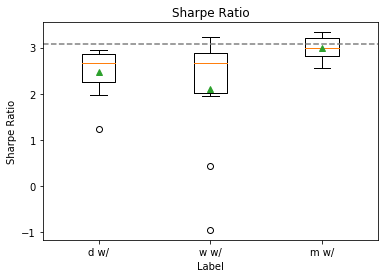

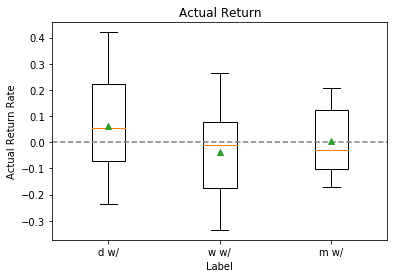

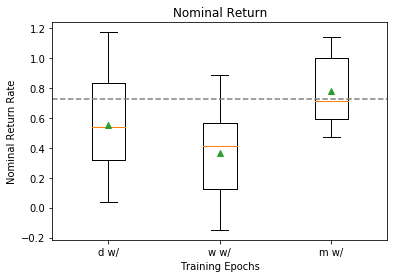

In [25]:
experiment_result = []
actual_return_result = []
nominal_return_result = []
types = [tmp['type'] for tmp in freq_list]
a = True
for j, experiment in enumerate(freq_list[3:]):
    DIR = path.join("./from github/Stock-Trading-Environment",experiment["DIR"])
    sharpe_list = []
    actual_profit_list = []
    nominal_profit_list = []
    for i in range(10):
        record = pickle.load(open(path.join(DIR,experiment["prefix"]+str(i)+".out"), "rb"))
        df = pd.DataFrame(record)
        startDate = experiment["start_date"]
        endDate = experiment["end_date"]
        sharpe = getSharpeRatio(df["net_worth"], startDate, endDate, tbill_df)
        sharpe_list.append(sharpe)
#         print(i, sharpe)
        actual_profit_list.append(df["actual_profit"].iloc[-1]/518237.12345884787)
        nominal_profit_list.append((df["net_worth"].iloc[-1]-300000)/300000)
    
    avg_sharpe = np.mean(sharpe_list)
    experiment_result.append(np.array(sharpe_list))
    actual_return_result.append(np.array(actual_profit_list))
    nominal_return_result.append(np.array(nominal_profit_list))
    print(experiment['type'])
    print("AVG Sharpe: ", avg_sharpe)
    print("AVG Act Profit: ", np.mean(actual_profit_list))
    print("AVG Nom Profit: ", np.mean(nominal_profit_list))
    print("===================")
    a = False
    
plt.boxplot(experiment_result, labels=types[3:], showmeans=True)
plt.axhline(y=bnh_ratio["2015-2019"], color = "grey", linestyle='--')
plt.ylabel("Sharpe Ratio")
plt.xlabel("Label")
plt.title("Sharpe Ratio")
plt.show()

plt.boxplot(actual_return_result, labels=types[3:], showmeans=True)
plt.axhline(y=0, color = "grey", linestyle='--')
plt.ylabel("Actual Return Rate")
plt.xlabel("Label")
plt.title("Actual Return")
plt.show()

plt.boxplot(nominal_return_result, labels=types[3:], showmeans=True)
plt.axhline(y=218237.12345884787/300000, color = "grey", linestyle='--')
plt.ylabel("Nominal Return Rate")
plt.xlabel("Training Epochs")
plt.title("Nominal Return")
plt.show()


In [78]:
plot_input = {
    "w/o Cash-out":
        {"2015-2019":{
            "DIR": "./output/306",
            "prefix": "BRZ_TW_NASDAQ-Selected_Trans-withleakage+RSI-_detailed-ModelNo-200000-",
            "start_date": pd.to_datetime("2015-01-01"),
            "end_date": pd.to_datetime("2019-12-31"),
        },
        "2001-2004":{
            "DIR": "./output/307",
            "prefix": "BRZ_TW_NASDAQ-Selected_Trans-withleakage+RSI-_detailed-ModelNo-200000-",
            "start_date": pd.to_datetime("2001-01-01"),
            "end_date": pd.to_datetime("2004-12-31"),
        },
        "2007-2010":{
            "DIR": "./output/308",
            "prefix": "BRZ_TW_NASDAQ-Selected_Trans-withleakage+RSI-_detailed-ModelNo-200000-",
            "start_date": pd.to_datetime("2007-01-01"),
            "end_date": pd.to_datetime("2010-12-31"),
        },
    },
    "20% Cash-out":{
        "2015-2019":{
            "DIR": "./output/410",
            "prefix": "Testing_cashout-20-_detailed-ModelNo-200000-",
            "start_date": pd.to_datetime("2015-01-01"),
            "end_date": pd.to_datetime("2019-12-31"),
        },
        "2001-2004":{
            "DIR": "./output/411",
            "prefix": "Testing_cashout-20-_detailed-ModelNo-200000-",
            "start_date": pd.to_datetime("2001-01-01"),
            "end_date": pd.to_datetime("2004-12-31"),
        },
        "2007-2010":{
            "DIR": "./output/412",
            "prefix": "Testing_cashout-20-_detailed-ModelNo-200000-",
            "start_date": pd.to_datetime("2007-01-01"),
            "end_date": pd.to_datetime("2010-12-31"),
        },
    },
    "15% Cash-out":{
        "2015-2019":{
            "DIR": "./output/420",
            "prefix": "Testing_cashout-20-_detailed-ModelNo-200000-",
            "start_date": pd.to_datetime("2015-01-01"),
            "end_date": pd.to_datetime("2019-12-31"),
        },
        "2001-2004":{
            "DIR": "./output/421",
            "prefix": "Testing_cashout-20-_detailed-ModelNo-200000-",
            "start_date": pd.to_datetime("2001-01-01"),
            "end_date": pd.to_datetime("2004-12-31"),
        },
        "2007-2010":{
            "DIR": "./output/422",
            "prefix": "Testing_cashout-20-_detailed-ModelNo-200000-",
            "start_date": pd.to_datetime("2007-01-01"),
            "end_date": pd.to_datetime("2010-12-31"),
        },
    },
    "10% Cash-out":{
        "2015-2019":{
            "DIR": "./output/430",
            "prefix": "Testing_cashout-20-_detailed-ModelNo-200000-",
            "start_date": pd.to_datetime("2015-01-01"),
            "end_date": pd.to_datetime("2019-12-31"),
        },
        "2001-2004":{
            "DIR": "./output/431",
            "prefix": "Testing_cashout-20-_detailed-ModelNo-200000-",
            "start_date": pd.to_datetime("2001-01-01"),
            "end_date": pd.to_datetime("2004-12-31"),
        },
        "2007-2010":{
            "DIR": "./output/432",
            "prefix": "Testing_cashout-20-_detailed-ModelNo-200000-",
            "start_date": pd.to_datetime("2007-01-01"),
            "end_date": pd.to_datetime("2010-12-31"),
        },
    },
}

bnh_ratio={
    "2015-2019": 3.0693999444726088,
    "2001-2004": 1.0730432708521411,
    "2007-2010": 1.8942480597911275,
}

bnh_value = {
    "2015-2019": 518237.12345884787,
    "2001-2004": 358863.9586947755,
    "2007-2010": 417726.6062059703,
}

2015-2019 w/o Cash-out 0 2.907290846822229
2015-2019 w/o Cash-out 1 3.067293271308935
2015-2019 w/o Cash-out 2 3.3337547978331257
2015-2019 w/o Cash-out 3 2.5552364416906204
2015-2019 w/o Cash-out 4 2.796906750285803
2015-2019 w/o Cash-out 5 3.260725684745218
2015-2019 w/o Cash-out 6 3.2196967304026445
2015-2019 w/o Cash-out 7 3.166416102373691
2015-2019 w/o Cash-out 8 2.78958657374563
2015-2019 w/o Cash-out 9 2.860132280475718
2015-2019 w/o Cash-out
AVG Sharpe:  2.9957039479683614
AVG Act Profit:  0.0029373947521821415
AVG Nom Profit:  0.7793938402924498
2015-2019 20% Cash-out 0 2.621534696960391
2015-2019 20% Cash-out 1 3.1188936160041916
2015-2019 20% Cash-out 2 3.384933735945755
2015-2019 20% Cash-out 3 3.073421979582756
2015-2019 20% Cash-out 4 2.5889266417039436
2015-2019 20% Cash-out 5 3.0260682519470357
2015-2019 20% Cash-out 6 2.911513968749191
2015-2019 20% Cash-out 7 2.9011436942107247
2015-2019 20% Cash-out 8 3.1983842722886533
2015-2019 20% Cash-out 9 3.131396589895106
201

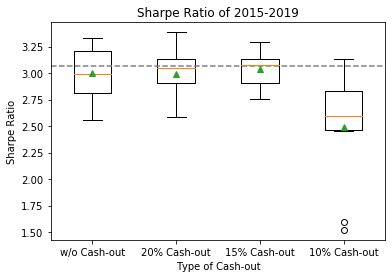

2001-2004 w/o Cash-out 0 -1.4841586922128918
2001-2004 w/o Cash-out 1 1.0275790708168624
2001-2004 w/o Cash-out 2 -3.0877992566733052
2001-2004 w/o Cash-out 3 0.8764402004309237
2001-2004 w/o Cash-out 4 -0.7697531260245002
2001-2004 w/o Cash-out 5 0.9588426519496356
2001-2004 w/o Cash-out 6 -0.6902015585201732
2001-2004 w/o Cash-out 7 1.658069022160744
2001-2004 w/o Cash-out 8 -1.1817599428057977
2001-2004 w/o Cash-out 9 -0.48138264897316785
2001-2004 w/o Cash-out
AVG Sharpe:  -0.317412427985167
AVG Act Profit:  -0.10742753150642612
AVG Nom Profit:  0.018229399514675195
2001-2004 20% Cash-out 0 -3.0767601902379442
2001-2004 20% Cash-out 1 -0.05112571169340456
2001-2004 20% Cash-out 2 -1.8713874048597534
2001-2004 20% Cash-out 3 -0.18562730917527842
2001-2004 20% Cash-out 4 0.6933408589831062
2001-2004 20% Cash-out 5 -1.1574716334977027
2001-2004 20% Cash-out 6 -1.6778320989635584
2001-2004 20% Cash-out 7 0.5536025591588792
2001-2004 20% Cash-out 8 -1.6213920643484092
2001-2004 20% Cash

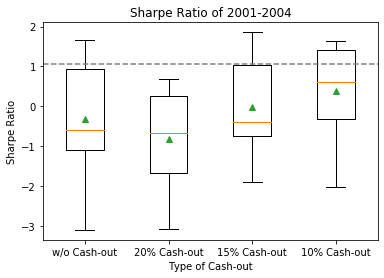

2007-2010 w/o Cash-out 0 0.9026864561907254
2007-2010 w/o Cash-out 1 1.5941335724865209
2007-2010 w/o Cash-out 2 0.7061786721187814
2007-2010 w/o Cash-out 3 0.5436801753889465
2007-2010 w/o Cash-out 4 2.9729663327358007
2007-2010 w/o Cash-out 5 1.2399900447480932
2007-2010 w/o Cash-out 6 0.8887726813284971
2007-2010 w/o Cash-out 7 2.0517654232671907
2007-2010 w/o Cash-out 8 1.9503179402354258
2007-2010 w/o Cash-out 9 0.8008753810878401
2007-2010 w/o Cash-out
AVG Sharpe:  1.3651366679587822
AVG Act Profit:  -0.010400756144339654
AVG Nom Profit:  0.25548179955496625
2007-2010 20% Cash-out 0 2.690748406036034
2007-2010 20% Cash-out 1 3.00784112565666
2007-2010 20% Cash-out 2 0.6162975182854433
2007-2010 20% Cash-out 3 2.555787039455852
2007-2010 20% Cash-out 4 2.8322569790563548
2007-2010 20% Cash-out 5 1.826720821515299
2007-2010 20% Cash-out 6 2.0532092495265197
2007-2010 20% Cash-out 7 2.6520015333830496
2007-2010 20% Cash-out 8 2.900254352212809
2007-2010 20% Cash-out 9 2.359648768770

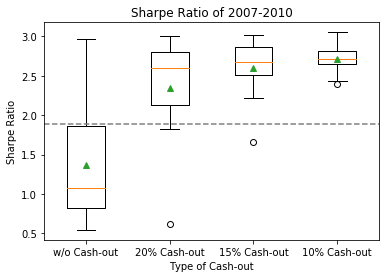

In [79]:
types = ["w/o Cash-out", "20% Cash-out", "15% Cash-out", "10% Cash-out"]
periods = ["2015-2019", "2001-2004", "2007-2010"]
# period = periods[0]
for period in periods:
    period_result = []
    actual_profit_list = []
    nominal_profit_list = []
    for tmp_type in types:
        DIR = path.join("./from github/Stock-Trading-Environment",plot_input[tmp_type][period]["DIR"])
        sharpe_list = []
        for i in range(10):
            record = pickle.load(open(path.join(DIR,plot_input[tmp_type][period]["prefix"]+str(i)+".out"), "rb"))
            df = pd.DataFrame(record)
            startDate = plot_input[tmp_type][period]["start_date"]
            endDate = plot_input[tmp_type][period]["end_date"]
            sharpe = getSharpeRatio(df["net_worth"], startDate, endDate, tbill_df)
            sharpe_list.append(sharpe)
            print(period, tmp_type, i, sharpe)
            
            
            actual_profit_list.append(df["actual_profit"].iloc[-1]/bnh_value[period])
            nominal_profit_list.append((df["net_worth"].iloc[-1]-300000)/300000)

        avg_sharpe = np.mean(sharpe_list)
        period_result.append(np.array(sharpe_list))
        actual_return_result.append(np.array(actual_profit_list))
        print(period, tmp_type)
        print("AVG Sharpe: ", avg_sharpe)
        print("AVG Act Profit: ", np.mean(actual_profit_list))
        print("AVG Nom Profit: ", np.mean(nominal_profit_list))
        print("===================")
            
            
            
#         avg_sharpe = np.mean(sharpe_list)
#         period_result.append(np.array(sharpe_list))
#         print("=========\n", period, tmp_type, avg_sharpe, "\n=========\n")

    plt.boxplot(period_result, labels=types, showmeans=True)
    plt.axhline(y=bnh_ratio[period], color = "grey", linestyle='--')
    plt.ylabel("Sharpe Ratio")
    plt.xlabel("Type of Cash-out")
    plt.title("Sharpe Ratio of "+period)
    plt.show()

In [ ]:
types = ["w/o Cash-out", "20% Cash-out", "15% Cash-out", "10% Cash-out"]
periods = ["2015-2019", "2001-2004", "2007-2010"]
# period = periods[0]
for period in periods:
    period_result = []
    for tmp_type in types:
        DIR = plot_input[tmp_type][period]["DIR"]
        batch_result = []
        for i in range(10):
            record = pickle.load(open(path.join(DIR,plot_input[tmp_type][period]["prefix"]+str(i)+".out"), "rb"))
            df = pd.DataFrame(record)
            result = dict(df['actual_profit'].describe())
            result['act_perc'] = df['actual_profit'].values[-1]/df['buyNhold_balance'].values[-1]
            batch_result.append(result)
        batch_result = pd.DataFrame(batch_result)
        period_result.append(np.array(batch_result['act_perc']))
    plt.boxplot([tmp*100 for tmp in period_result], labels=types, showmeans=True)
    plt.axhline(y=0, color = "grey", linestyle='--')
    plt.ylabel("Percentage better than Benchmark, %")
    plt.xlabel("Type of Cash-out")
    plt.title("Performance of "+period)
    plt.show()

In [22]:
ROOT_DIR = "./from github/Stock-Trading-Environment/"
DIR = "200"
prefix = "BRZ+TW+NASDAQ-Training_detailed-ModelNo-10000-"

In [14]:
i=0
startDate = pd.to_datetime("2015-01-01")
endDate = pd.to_datetime("2019-12-31")
record = pickle.load(open(path.join(ROOT_DIR+DIR, prefix+str(i)+".out"), "rb"))
df = pd.DataFrame(record)
sharpe = getSharpeRatio(df["net_worth"], startDate, endDate, tbill_df)
# sharpe_list.append(sharpe)
# print(period, tmp_type, i, sharpe)
print(sharpe)

301653.01312368416 143800.75635877365
-3.710355076715453


In [22]:
ROOT_DIR = "./from github/Stock-Trading-Environment/"
freq_list = [
    {
        "freq": 1,
        "training": "10k",
        "DIR": "./output/200",
        "prefix": "BRZ+TW+NASDAQ-Training_detailed-ModelNo-10000-",
        "start_date": pd.to_datetime("2015-01-01"),
        "end_date": pd.to_datetime("2019-12-31"),
    },
    {
        "freq": 1,
        "training": "50k",
        "DIR": "./output/201",
        "prefix": "BRZ+TW+NASDAQ-Training_detailed-ModelNo-50000-",
        "start_date": pd.to_datetime("2015-01-01"),
        "end_date": pd.to_datetime("2019-12-31"),
    },
    {
        "freq": 1,
        "training": "100k",
        "DIR": "./output/201",
        "prefix": "BRZ+TW+NASDAQ-Training_detailed-ModelNo-100000-",
        "start_date": pd.to_datetime("2015-01-01"),
        "end_date": pd.to_datetime("2019-12-31"),
    },
    {
        "freq": 1,
        "training": "500k",
        "DIR": "./output/202",
        "prefix": "BRZ+TW+NASDAQ-Training_detailed-ModelNo-500000-",
        "start_date": pd.to_datetime("2015-01-01"),
        "end_date": pd.to_datetime("2019-12-31"),
    }
]
bnh_ratio={
    "2015-2019": 3.0693999444726088,
    "2001-2004": 1.0730432708521411,
    "2007-2010": 1.8942480597911275,
}

10k
AVG Sharpe:  -3.5133479387425632
AVG Act Profit:  -0.7339363997690557
AVG Nom Profit:  -0.463987531344095
50k
AVG Sharpe:  -1.724428276882536
AVG Act Profit:  -0.5551992998375306
AVG Nom Profit:  -0.15522686293112767
100k
AVG Sharpe:  0.9848947011283787
AVG Act Profit:  -0.3691442299557554
AVG Nom Profit:  0.166175284470426
500k
AVG Sharpe:  2.2302187068519275
AVG Act Profit:  -0.2935273121688536
AVG Nom Profit:  0.2968002643327868


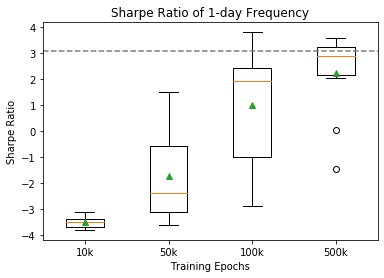

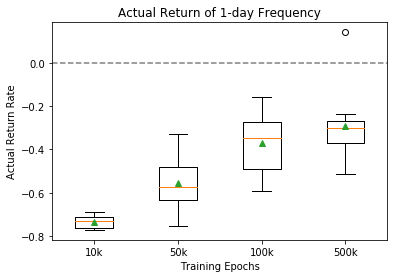

In [57]:
experiment_result = []
actual_return_result = []
types = [tmp['training'] for tmp in freq_list]

for experiment in freq_list:
    DIR = path.join("./from github/Stock-Trading-Environment",experiment["DIR"])
    sharpe_list = []
    actual_profit_list = []
    nominal_profit_list = []
    for i in range(10):
        record = pickle.load(open(path.join(DIR,experiment["prefix"]+str(i)+".out"), "rb"))
        df = pd.DataFrame(record)
        startDate = experiment["start_date"]
        endDate = experiment["end_date"]
        sharpe = getSharpeRatio(df["net_worth"], startDate, endDate, tbill_df)
        sharpe_list.append(sharpe)
#         print(i, sharpe)
        actual_profit_list.append(df["actual_profit"].iloc[-1]/518237.12345884787)
        nominal_profit_list.append((df["net_worth"].iloc[-1]-300000)/300000)
    
    avg_sharpe = np.mean(sharpe_list)
    experiment_result.append(np.array(sharpe_list))
    actual_return_result.append(np.array(actual_profit_list))
    print(experiment['training'])
    print("AVG Sharpe: ", avg_sharpe)
    print("AVG Act Profit: ", np.mean(actual_profit_list))
    print("AVG Nom Profit: ", np.mean(nominal_profit_list))
    print("===================")

    
plt.boxplot(experiment_result, labels=types, showmeans=True)
plt.axhline(y=bnh_ratio["2015-2019"], color = "grey", linestyle='--')
plt.ylabel("Sharpe Ratio")
plt.xlabel("Training Epochs")
plt.title("Sharpe Ratio of 1-day Frequency")
plt.show()

plt.boxplot(actual_return_result, labels=types, showmeans=True)
plt.axhline(y=0, color = "grey", linestyle='--')
plt.ylabel("Actual Return Rate")
plt.xlabel("Training Epochs")
plt.title("Actual Return of 1-day Frequency")
plt.show()

In [58]:
ROOT_DIR = "./from github/Stock-Trading-Environment/"
freq_list = [
    {
        "freq": 7,
        "training": "50k",
        "DIR": "./output/204",
        "prefix": "BRZ+TW+NASDAQ-Training-punish_detailed-ModelNo-50000-",
        "start_date": pd.to_datetime("2015-01-01"),
        "end_date": pd.to_datetime("2019-12-31"),
    },
    {
        "freq": 7,
        "training": "100k",
        "DIR": "./output/205",
        "prefix": "BRZ+TW+NASDAQ-Training-swap-nopunish-7d_detailed-ModelNo-100000-",
        "start_date": pd.to_datetime("2015-01-01"),
        "end_date": pd.to_datetime("2019-12-31"),
    },
    {
        "freq": 7,
        "training": "200k",
        "DIR": "./output/204",
        "prefix": "BRZ+TW+NASDAQ-Training-punish_detailed-ModelNo-200000-",
        "start_date": pd.to_datetime("2015-01-01"),
        "end_date": pd.to_datetime("2019-12-31"),
    },
]
bnh_ratio={
    "2015-2019": 3.0693999444726088,
    "2001-2004": 1.0730432708521411,
    "2007-2010": 1.8942480597911275,
}

50k
AVG Sharpe:  2.4002320731600397
AVG Act Profit:  -0.2025933778041949
AVG Nom Profit:  0.4214797205802969
100k
AVG Sharpe:  2.9738398766293535
AVG Act Profit:  -0.10714557756799478
AVG Nom Profit:  0.5863616986965738
200k
AVG Sharpe:  3.011903591009802
AVG Act Profit:  -0.08855476894879144
AVG Nom Profit:  0.6184765226352068


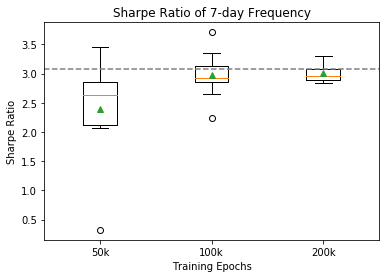

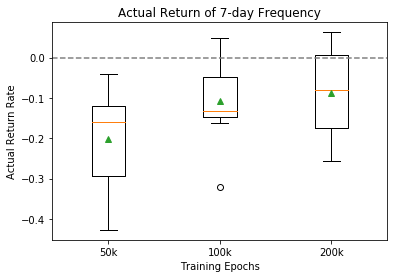

In [66]:
experiment_result = []
actual_return_result = []
types = [tmp['training'] for tmp in freq_list]
a = True
for j, experiment in enumerate(freq_list):
    DIR = path.join("./from github/Stock-Trading-Environment",experiment["DIR"])
    sharpe_list = []
    actual_profit_list = []
    nominal_profit_list = []
    if j != 2:
        theRange = range(10)
    else:
        theRange = [4,5,8,9]
    for i in theRange:
        record = pickle.load(open(path.join(DIR,experiment["prefix"]+str(i)+".out"), "rb"))
        df = pd.DataFrame(record)
        startDate = experiment["start_date"]
        endDate = experiment["end_date"]
        sharpe = getSharpeRatio(df["net_worth"], startDate, endDate, tbill_df)
        sharpe_list.append(sharpe)
#         print(i, sharpe)
        actual_profit_list.append(df["actual_profit"].iloc[-1]/518237.12345884787)
        nominal_profit_list.append((df["net_worth"].iloc[-1]-300000)/300000)
    
    avg_sharpe = np.mean(sharpe_list)
    experiment_result.append(np.array(sharpe_list))
    actual_return_result.append(np.array(actual_profit_list))
    print(experiment['training'])
    print("AVG Sharpe: ", avg_sharpe)
    print("AVG Act Profit: ", np.mean(actual_profit_list))
    print("AVG Nom Profit: ", np.mean(nominal_profit_list))
    print("===================")
    a = False
    
plt.boxplot(experiment_result, labels=types, showmeans=True)
plt.axhline(y=bnh_ratio["2015-2019"], color = "grey", linestyle='--')
plt.ylabel("Sharpe Ratio")
plt.xlabel("Training Epochs")
plt.title("Sharpe Ratio of 7-day Frequency")
plt.show()

plt.boxplot(actual_return_result, labels=types, showmeans=True)
plt.axhline(y=0, color = "grey", linestyle='--')
plt.ylabel("Actual Return Rate")
plt.xlabel("Training Epochs")
plt.title("Actual Return of 7-day Frequency")
plt.show()

In [67]:
ROOT_DIR = "./from github/Stock-Trading-Environment/"
freq_list = [
    {
        "freq": 20,
        "training": "10k",
        "DIR": "./output/306",
        "prefix": "BRZ_TW_NASDAQ-Selected_Trans-withleakage+RSI-_detailed-ModelNo-10000-",
        "start_date": pd.to_datetime("2015-01-01"),
        "end_date": pd.to_datetime("2019-12-31"),
    },
    {
        "freq": 20,
        "training": "50k",
        "DIR": "./output/306",
        "prefix": "BRZ_TW_NASDAQ-Selected_Trans-withleakage+RSI-_detailed-ModelNo-50000-",
        "start_date": pd.to_datetime("2015-01-01"),
        "end_date": pd.to_datetime("2019-12-31"),
    },
    {
        "freq": 20,
        "training": "100k",
        "DIR": "./output/306",
        "prefix": "BRZ_TW_NASDAQ-Selected_Trans-withleakage+RSI-_detailed-ModelNo-100000-",
        "start_date": pd.to_datetime("2015-01-01"),
        "end_date": pd.to_datetime("2019-12-31"),
    },
    {
        "freq": 20,
        "training": "200k",
        "DIR": "./output/306",
        "prefix": "BRZ_TW_NASDAQ-Selected_Trans-withleakage+RSI-_detailed-ModelNo-200000-",
        "start_date": pd.to_datetime("2015-01-01"),
        "end_date": pd.to_datetime("2019-12-31"),
    },
]
bnh_ratio={
    "2015-2019": 3.0693999444726088,
    "2001-2004": 1.0730432708521411,
    "2007-2010": 1.8942480597911275,
}

10k
AVG Sharpe:  2.95652405468243
AVG Act Profit:  -0.049049680531268555
AVG Nom Profit:  0.6972375885232485
50k
AVG Sharpe:  3.002501802019494
AVG Act Profit:  -0.06316608451104301
AVG Nom Profit:  0.6684139437894628
100k
AVG Sharpe:  2.8961170935797065
AVG Act Profit:  -0.024022738727940415
AVG Nom Profit:  0.7344296178689562
200k
AVG Sharpe:  2.9957039479683614
AVG Act Profit:  0.0029373947521821415
AVG Nom Profit:  0.7793938402924498


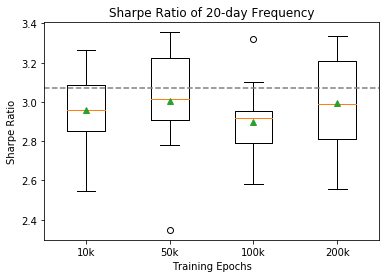

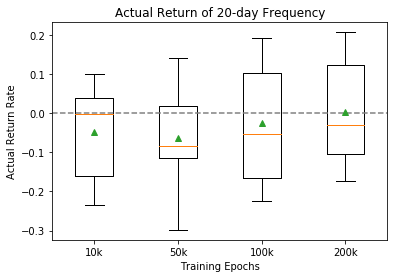

In [69]:
experiment_result = []
actual_return_result = []
types = [tmp['training'] for tmp in freq_list]
a = True
for j, experiment in enumerate(freq_list):
    DIR = path.join("./from github/Stock-Trading-Environment",experiment["DIR"])
    sharpe_list = []
    actual_profit_list = []
    nominal_profit_list = []
    for i in range(10):
        record = pickle.load(open(path.join(DIR,experiment["prefix"]+str(i)+".out"), "rb"))
        df = pd.DataFrame(record)
        startDate = experiment["start_date"]
        endDate = experiment["end_date"]
        sharpe = getSharpeRatio(df["net_worth"], startDate, endDate, tbill_df)
        sharpe_list.append(sharpe)
#         print(i, sharpe)
        actual_profit_list.append(df["actual_profit"].iloc[-1]/518237.12345884787)
        nominal_profit_list.append((df["net_worth"].iloc[-1]-300000)/300000)
    
    avg_sharpe = np.mean(sharpe_list)
    experiment_result.append(np.array(sharpe_list))
    actual_return_result.append(np.array(actual_profit_list))
    print(experiment['training'])
    print("AVG Sharpe: ", avg_sharpe)
    print("AVG Act Profit: ", np.mean(actual_profit_list))
    print("AVG Nom Profit: ", np.mean(nominal_profit_list))
    print("===================")
    a = False
    
plt.boxplot(experiment_result, labels=types, showmeans=True)
plt.axhline(y=bnh_ratio["2015-2019"], color = "grey", linestyle='--')
plt.ylabel("Sharpe Ratio")
plt.xlabel("Training Epochs")
plt.title("Sharpe Ratio of 20-day Frequency")
plt.show()

plt.boxplot(actual_return_result, labels=types, showmeans=True)
plt.axhline(y=0, color = "grey", linestyle='--')
plt.ylabel("Actual Return Rate")
plt.xlabel("Training Epochs")
plt.title("Actual Return of 20-day Frequency")
plt.show()

In [67]:
ROOT_DIR = "./from github/Stock-Trading-Environment/"
freq_list = [
    {
        "freq": 20,
        "training": "2001-2004",
        "DIR": "./output/307",
        "prefix": "BRZ_TW_NASDAQ-Selected_Trans-withleakage+RSI-_detailed-ModelNo-200000-",
        "start_date": pd.to_datetime("2001-01-01"),
        "end_date": pd.to_datetime("2004-12-31"),
    },
    {
        "freq": 20,
        "training": "",
        "DIR": "./output/308",
        "prefix": "BRZ_TW_NASDAQ-Selected_Trans-withleakage+RSI-_detailed-ModelNo-50000-",
        "start_date": pd.to_datetime("2015-01-01"),
        "end_date": pd.to_datetime("2019-12-31"),
    },
    {
        "freq": 20,
        "training": "100k",
        "DIR": "./output/306",
        "prefix": "BRZ_TW_NASDAQ-Selected_Trans-withleakage+RSI-_detailed-ModelNo-100000-",
        "start_date": pd.to_datetime("2015-01-01"),
        "end_date": pd.to_datetime("2019-12-31"),
    },
    {
        "freq": 20,
        "training": "200k",
        "DIR": "./output/306",
        "prefix": "BRZ_TW_NASDAQ-Selected_Trans-withleakage+RSI-_detailed-ModelNo-200000-",
        "start_date": pd.to_datetime("2015-01-01"),
        "end_date": pd.to_datetime("2019-12-31"),
    },
]
bnh_ratio={
    "2015-2019": 3.0693999444726088,
    "2001-2004": 1.0730432708521411,
    "2007-2010": 1.8942480597911275,
}

10k
AVG Sharpe:  2.95652405468243
AVG Act Profit:  -0.049049680531268555
AVG Nom Profit:  0.6972375885232485
50k
AVG Sharpe:  3.002501802019494
AVG Act Profit:  -0.06316608451104301
AVG Nom Profit:  0.6684139437894628
100k
AVG Sharpe:  2.8961170935797065
AVG Act Profit:  -0.024022738727940415
AVG Nom Profit:  0.7344296178689562
200k
AVG Sharpe:  2.9957039479683614
AVG Act Profit:  0.0029373947521821415
AVG Nom Profit:  0.7793938402924498


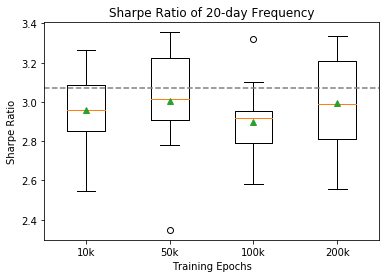

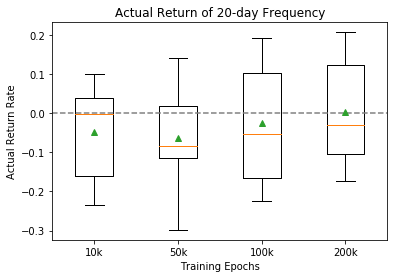

In [69]:
experiment_result = []
actual_return_result = []
types = [tmp['training'] for tmp in freq_list]
a = True
for j, experiment in enumerate(freq_list):
    DIR = path.join("./from github/Stock-Trading-Environment",experiment["DIR"])
    sharpe_list = []
    actual_profit_list = []
    nominal_profit_list = []
    for i in range(10):
        record = pickle.load(open(path.join(DIR,experiment["prefix"]+str(i)+".out"), "rb"))
        df = pd.DataFrame(record)
        startDate = experiment["start_date"]
        endDate = experiment["end_date"]
        sharpe = getSharpeRatio(df["net_worth"], startDate, endDate, tbill_df)
        sharpe_list.append(sharpe)
#         print(i, sharpe)
        actual_profit_list.append(df["actual_profit"].iloc[-1]/518237.12345884787)
        nominal_profit_list.append((df["net_worth"].iloc[-1]-300000)/300000)
    
    avg_sharpe = np.mean(sharpe_list)
    experiment_result.append(np.array(sharpe_list))
    actual_return_result.append(np.array(actual_profit_list))
    print(experiment['training'])
    print("AVG Sharpe: ", avg_sharpe)
    print("AVG Act Profit: ", np.mean(actual_profit_list))
    print("AVG Nom Profit: ", np.mean(nominal_profit_list))
    print("===================")
    a = False
    
plt.boxplot(experiment_result, labels=types, showmeans=True)
plt.axhline(y=bnh_ratio["2015-2019"], color = "grey", linestyle='--')
plt.ylabel("Sharpe Ratio")
plt.xlabel("Training Epochs")
plt.title("Sharpe Ratio of 20-day Frequency")
plt.show()

plt.boxplot(actual_return_result, labels=types, showmeans=True)
plt.axhline(y=0, color = "grey", linestyle='--')
plt.ylabel("Actual Return Rate")
plt.xlabel("Training Epochs")
plt.title("Actual Return of 20-day Frequency")
plt.show()